### Load materias

In [71]:
import pandas as pd
materias_df = pd.read_csv('output/materias/senate-materias-2017.csv', index_col='CodigoMateria')

In [74]:
pd.set_option('display.max_colwidth', -1)
materias_df.head(2)
# print(materias_df['EmentaMateria'])
# materias_df[materias_df.index == 128185]

,SiglaCasaMateria,SiglaSubtipoMateria,AnoMateria,DescricaoMateria,EmentaMateria,ExplicacaoEmentaMateria,DataApresentacao,NomeNatureza,CodigoParlamentarAutor,NomeParlamentarAutor,SexoParlamentarAutor,UfParlamentarAutor,PartidoParlamentarAutor,SiglaSituacaoMateria,SiglaLocalMateria,CodigosRelatoresMateria
CodigoMateria,,,,,,,,,,,,,,,,
127935,SF,PLS,2017,PLS 00001/2017,"Acrescenta o art. 22-A na Lei nº 8.981, de 20 de janeiro de 1995, para prever a possibilidade de atualizar a 31 de dezembro de 2016 o custo de aquisição de bens e direitos sujeitos à tributação do ganho de capital mediante a incidência de alíquota reduzida.","Determina que a diferença entre o custo de aquisição do bem ou direito de qualquer natureza e seu valor de mercado atualizado com base no dia 31 de dezembro de 2016, sujeita-se a incidência do Imposto de Renda, à alíquota única de 10%, a título de ganho de capital.",2017-02-03,NORMA_GERAL,3634,Flexa Ribeiro,Masculino,PA,PSDB,RELATOR,CAE,NaN
127934,SF,PLS,2017,PLS 00002/2017,Dispõe sobre os crimes de responsabilidade e as respectivas normas de processo e julgamento.,Propõe uma nova Lei de Crimes de Responsabilidade consentânea com os ditames constitucionais e que diminua as lacunas das normas vigentes.,2017-02-03,NORMA_GERAL,2207,Raimundo Lira,Masculino,PB,MDB,RELATOR,CCJ,NaN


### Show statistics

In [6]:
import matplotlib.pyplot as plt
s = materias_df.groupby(['SexoParlamentarAutor']).size()
s = tuple(zip(s,s.index))
plt.title('Sexo')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

<Figure size 640x480 with 1 Axes>

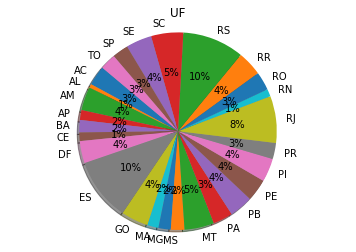

In [7]:
s = materias_df.groupby(['UfParlamentarAutor']).size()
s = tuple(zip(s,s.index))
plt.title('UF')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

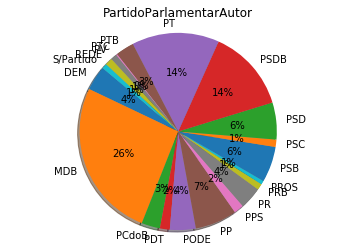

In [8]:
s = materias_df.groupby(['PartidoParlamentarAutor']).size()
s = tuple(zip(s,s.index))
plt.title('PartidoParlamentarAutor')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

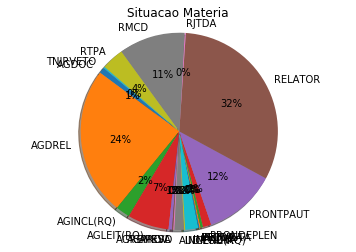

In [9]:
s = materias_df.groupby(['SiglaSituacaoMateria']).size()
s = tuple(zip(s,s.index))
plt.title('Situacao Materia')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

(515,)
CodigosRelatoresMateria
0    308
1    149
2     43
3     11
4      3
5      1
Name: CodigosRelatoresMateria, dtype: int64


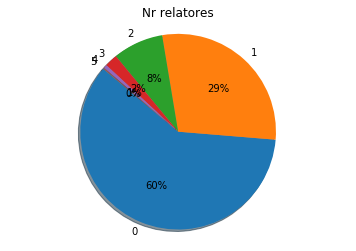

In [10]:
relatores = materias_df['CodigosRelatoresMateria'].str.split()
def count(a):
    try:
        return len(a)
    except:
        return 0

relatores = relatores.apply(count)
relatores.rename('nr')
print(relatores.shape)
relatores = relatores.groupby(relatores).size()
print(relatores)

plt.title('Nr relatores')
plt.pie(relatores, labels=[x for x in range(len(relatores))],
       autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Explore materia contents

In [11]:
import modules.nlputils as nlputils
from wordcloud import WordCloud

def plot_wordcloud(document_contents):
    words = []
    for t in document_contents:
        for a in t:
            words.append(a)
    text = ''
    text = ' '.join(list(words))
    wordcloud = WordCloud(max_font_size=40, random_state=42).generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

All materias 2017
qtty=515
Simple Wordcloud


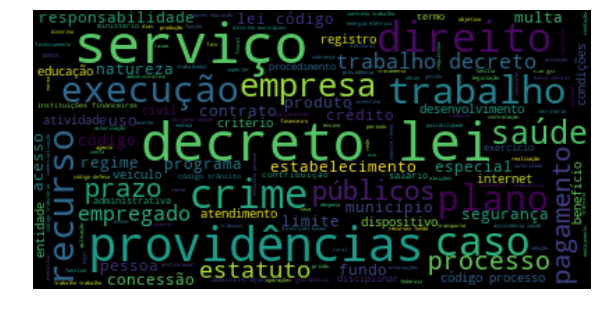

In [94]:
from modules.nlputils import StemFilterTokenizeProcessor

materias_df = pd.read_csv('output/materias/senate-materias-2017.csv', index_col='CodigoMateria')
materias_df['conteudo'] = materias_df['EmentaMateria'] + ' ' + materias_df['ExplicacaoEmentaMateria']
materias = materias_df[['conteudo']]
materias = [str(s[0]) for s in materias.values[:]]
print('All materias 2017')
print('qtty=' + str(len(materias)))
print('Simple Wordcloud')

stopwords = set([line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8')])
proc = StemFilterTokenizeProcessor(stopwords, min_size=3, filter_regex='[a-z0-9]', stem_language='portuguese', stem_complete=True, only_nouns=True)
tokens = proc.tokenize_documents(materias)

plot_wordcloud(tokens)

### Find similar materias

(61, 61)
[[1.00000000e+00 1.81412547e-03 6.45983985e-03 ... 5.78615208e-03
  9.86663715e-03 2.84256509e-02]
 [1.81412547e-03 1.00000000e+00 1.31415698e-03 ... 1.17710536e-03
  6.87651309e-04 1.64296184e-02]
 [6.45983985e-03 1.31415698e-03 1.00000000e+00 ... 8.14709865e-03
  7.68605861e-03 1.92707078e-01]
 ...
 [5.78615208e-03 1.17710536e-03 8.14709865e-03 ... 1.00000000e+00
  2.68480058e-03 8.89053853e-03]
 [9.86663715e-03 6.87651309e-04 7.68605861e-03 ... 2.68480058e-03
  1.00000000e+00 8.38742763e-03]
 [2.84256509e-02 1.64296184e-02 1.92707078e-01 ... 8.89053853e-03
  8.38742763e-03 1.00000000e+00]]


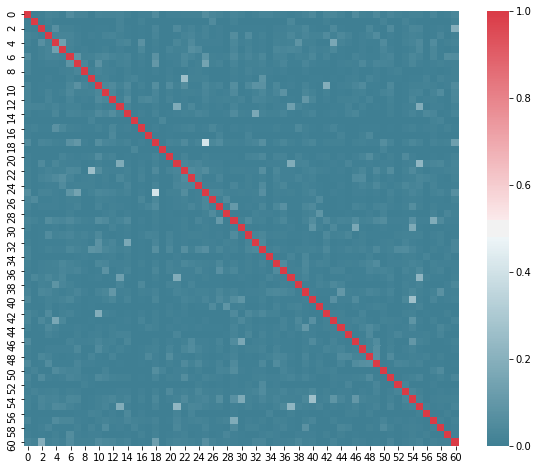

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

materias_df = pd.read_csv('output/materias/senate-materias-2017.csv', index_col='CodigoMateria')
materias_df = materias_df.loc[materias_df['SiglaSituacaoMateria'] == 'PRONTPAUT']
materias_df['conteudo'] = materias_df['EmentaMateria'] + ' ' + materias_df['ExplicacaoEmentaMateria']
materias = materias_df[['conteudo']]
materias = [str(s[0]) for s in materias.values[:]]

proc = StemFilterTokenizeProcessor(min_size=4, filter_regex='[a-z0-9]', stem_language='portuguese', stem_complete=True, only_nouns=False)
vec = TfidfVectorizer(min_df=0.01, stop_words=[], analyzer='word', ngram_range=(1, 2), preprocessor=proc.process_text)
X = vec.fit_transform(materias)

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#calculate NxN cosine distante between all elements
similarity_cos = (X * X.T).toarray()
print(np.shape(similarity_cos))

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(similarity_cos, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

print(similarity_cos)

In [109]:
for a in range(len(similarity_cos)):
    for b in range(len(similarity_cos[a])):
        v = similarity_cos[a][b]
        if v>0.25 and a!=b:
            print('==============================')
            print(materias[a] + '\n    >>>SEEMS LIKE \n' + materias[b] + ': ' + str(v))


Cria o Prêmio Cidade Acessível, destinado aos municípios mais bem colocados na classificação de avaliação do cumprimento das disposições da Lei nº 13.146, de 6 de julho de 2015, que institui a Lei Brasileira de Inclusão da Pessoa com Deficiência (Estatuto da Pessoa com Deficiência). Institui o Prêmio Cidade Acessível, destinado anualmente aos municípios, com população superior a cinquenta mil habitantes, mais bem colocados em classificação de avaliação do cumprimento das disposições da Lei nº 13.146/15, Estatuto da Pessoa com Deficiência.
    >>>SEEMS LIKE 
Altera o art. 94 da Lei nº 13.146, de 6 de julho de 2015, para dispor sobre o auxílio-inclusão. Altera o Estatuto da Pessoa com Deficiência (Lei 13.146/2015) para tornar efetivo o auxílio-inclusão, mediante a fixação do valor e das condições para recebimento.: 0.26049602056871884
Altera a Lei n° 8.080, de 19 de setembro de 1990, que dispõe sobre as condições para a promoção, proteção e recuperação da saúde, a organização e o funcion